In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('adult.data', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
desc = {'column' : list(df.columns),
        'dtype' : df.dtypes,
        'null' : df.isnull().sum(),
        'null_%' : df.isnull().sum()/df.shape[0],
        'unique' : df.nunique(),
        'unique_%' : df.nunique()/df.shape[0]}
desc = pd.DataFrame(desc)

In [6]:
desc

,column,dtype,null,null_%,unique,unique_%
0,0,int64,0,0.0,73,0.002242
1,1,object,0,0.0,9,0.000276
2,2,int64,0,0.0,21648,0.664844
3,3,object,0,0.0,16,0.000491
4,4,int64,0,0.0,16,0.000491
5,5,object,0,0.0,7,0.000215
6,6,object,0,0.0,15,0.000461
7,7,object,0,0.0,6,0.000184
8,8,object,0,0.0,5,0.000154
9,9,object,0,0.0,2,0.000061


In [7]:
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Gross-income']

In [8]:
df.columns = cols

In [9]:
new_desc = {'column' : list(df.columns),
            'dtype' : df.dtypes,
            'null' : df.isnull().sum(),
            'null_%' : df.isnull().sum()/df.shape[0],
            'unique' : df.nunique(),
            'unique_%' : df.nunique()/df.shape[0]}

new_desc = pd.DataFrame(new_desc)

In [10]:
new_desc

,column,dtype,null,null_%,unique,unique_%
Age,Age,int64,0,0.0,73,0.002242
Workclass,Workclass,object,0,0.0,9,0.000276
Fnlwgt,Fnlwgt,int64,0,0.0,21648,0.664844
Education,Education,object,0,0.0,16,0.000491
Education-num,Education-num,int64,0,0.0,16,0.000491
Marital-status,Marital-status,object,0,0.0,7,0.000215
Occupation,Occupation,object,0,0.0,15,0.000461
Relationship,Relationship,object,0,0.0,6,0.000184
Race,Race,object,0,0.0,5,0.000154
Sex,Sex,object,0,0.0,2,0.000061


In [11]:
df['Capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [12]:
df.replace(' ?', np.nan, inplace = True)

In [13]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Gross-income         0
dtype: int64

In [14]:
obj_indexes = list(new_desc.loc[new_desc['dtype'] == 'object'].index)

In [15]:
int_indexes = list(new_desc.loc[~(new_desc['dtype'] == 'object')].index)

In [16]:
obj_indexes

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country',
 'Gross-income']

In [17]:
int_indexes

['Age',
 'Fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

In [18]:
def uni_plot(df, lst):
    for i in lst:
        plt.figure(figsize = (16, 10))
        sns.distplot(df.loc[:, i], color = 'green')
        plt.show()

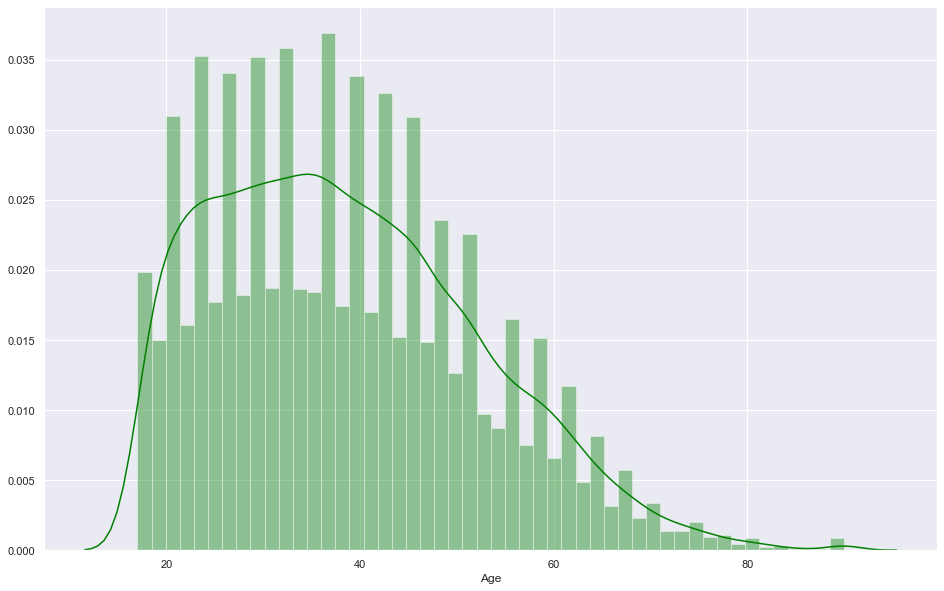

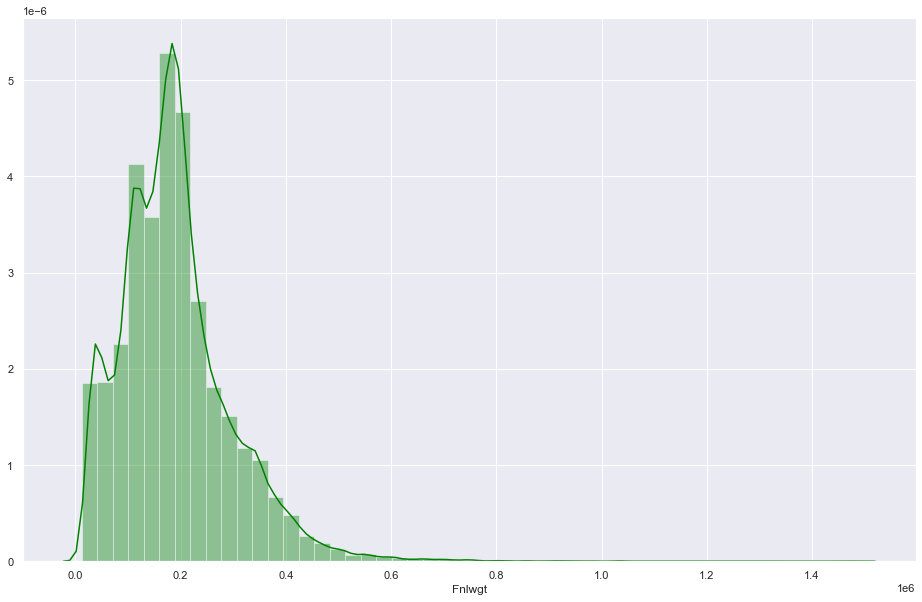

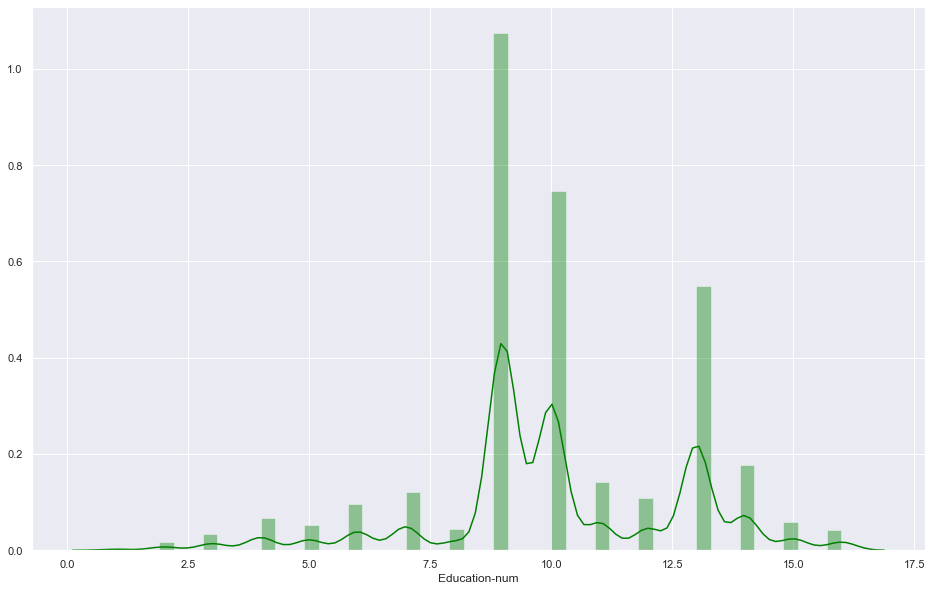

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


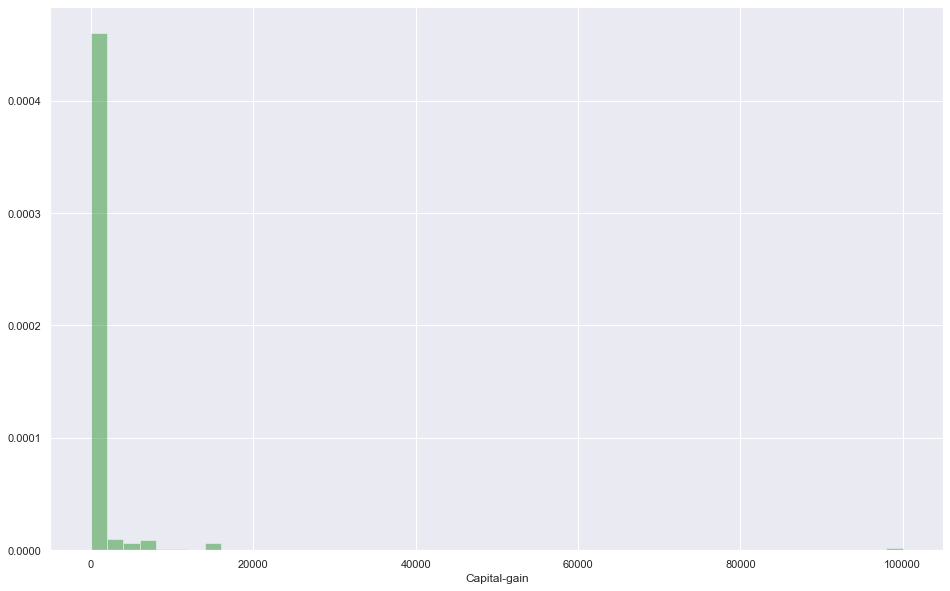

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


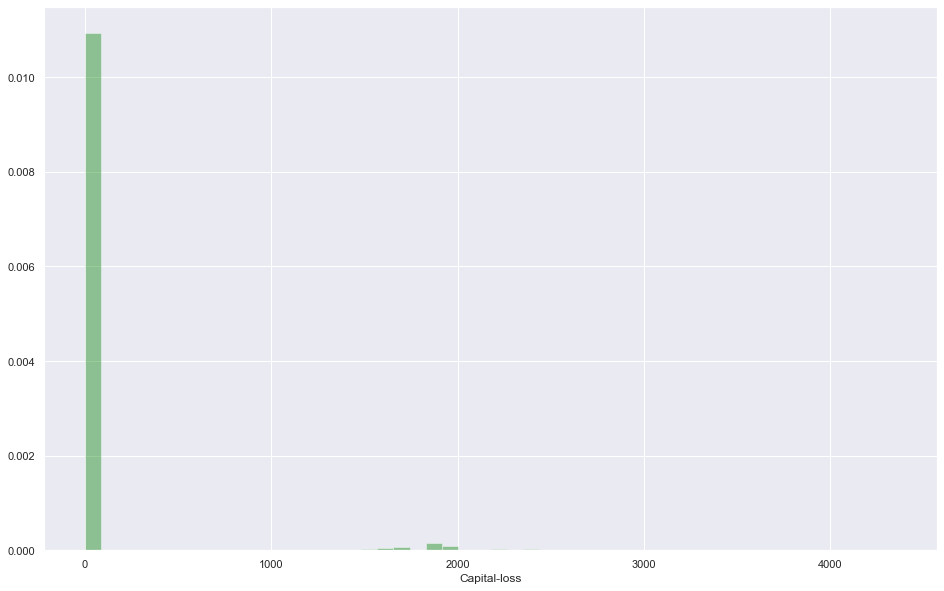

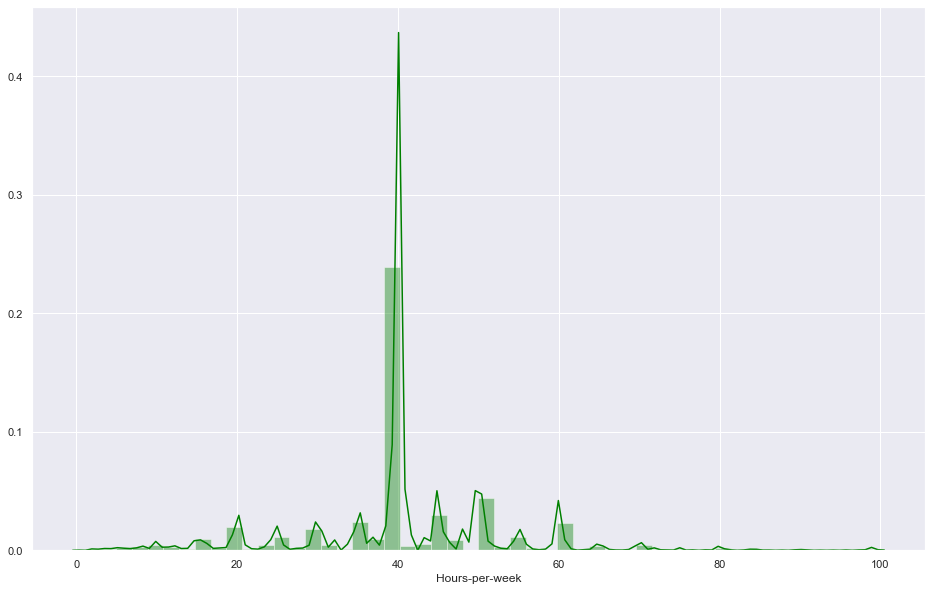

In [19]:
uni_plot(df, int_indexes)

In [20]:
df = df.fillna(method = 'ffill')

In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Gross-income      0
dtype: int64

In [22]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [23]:
X = pd.get_dummies(X)

In [24]:
X.shape

(32561, 105)

In [25]:
X.head() 

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from pprint import pprint as pp
pp(list(X.columns))

['Age',
 'Fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week',
 'Workclass_ Federal-gov',
 'Workclass_ Local-gov',
 'Workclass_ Never-worked',
 'Workclass_ Private',
 'Workclass_ Self-emp-inc',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ State-gov',
 'Workclass_ Without-pay',
 'Education_ 10th',
 'Education_ 11th',
 'Education_ 12th',
 'Education_ 1st-4th',
 'Education_ 5th-6th',
 'Education_ 7th-8th',
 'Education_ 9th',
 'Education_ Assoc-acdm',
 'Education_ Assoc-voc',
 'Education_ Bachelors',
 'Education_ Doctorate',
 'Education_ HS-grad',
 'Education_ Masters',
 'Education_ Preschool',
 'Education_ Prof-school',
 'Education_ Some-college',
 'Marital-status_ Divorced',
 'Marital-status_ Married-AF-spouse',
 'Marital-status_ Married-civ-spouse',
 'Marital-status_ Married-spouse-absent',
 'Marital-status_ Never-married',
 'Marital-status_ Separated',
 'Marital-status_ Widowed',
 'Occupation_ Adm-clerical',
 'Occupation_ Armed-Forces',
 'Occupation_ Craft-re

In [27]:
X.shape

(32561, 105)

In [28]:
X.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
le = LabelEncoder()

In [30]:
y = le.fit_transform(y)

In [31]:
from sklearn.preprocessing import PowerTransformer

In [32]:
power = PowerTransformer(method = 'yeo-johnson')

In [33]:
from lightgbm import LGBMClassifier

In [34]:
lgbm = LGBMClassifier(random_state = 123)
lgbm_pipe = Pipeline(steps = [('power', power),
                              ('lgbm', lgbm)])

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

In [36]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats  = 3)
scores = cross_validate(estimator = lgbm_pipe, X = X, y = y, cv = cv, n_jobs = -1,
                        scoring = ['roc_auc', 'accuracy'], return_train_score = True)

In [37]:
scores

{'fit_time': array([12.9689889 , 12.97998261, 13.01895761, 12.91602588, 12.34637141,
        11.86567402, 12.11351037, 12.03756213, 13.20684624, 13.39572716,
        13.32677603, 13.27279878, 11.88265991, 12.06854367, 12.16548514,
        12.05655241, 12.27142525, 12.2384429 , 12.33238411, 12.36035609,
        14.00134921, 14.6109767 , 14.6679399 , 14.76688123, 15.22959232,
        15.01972556, 15.54340196, 15.10966444, 10.47252917, 10.20769548]),
 'score_time': array([0.27982807, 0.29282165, 0.28783131, 0.2878201 , 0.29182029,
        0.26583266, 0.30480814, 0.30881071, 0.27982688, 0.34478641,
        0.35477686, 0.34578466, 0.29082489, 0.27882957, 0.29082608,
        0.28682518, 0.3397882 , 0.31380415, 0.31880188, 0.3317976 ,
        0.73154902, 0.35677838, 0.36977553, 0.40774941, 0.31481147,
        0.35478044, 0.33779216, 0.33779359, 0.22086716, 0.22186303]),
 'test_roc_auc': array([0.92006447, 0.93659987, 0.92720407, 0.93241808, 0.92301687,
        0.91797623, 0.93673196, 0.932987

In [38]:
def class_report(scores):
    pp('Classification report on model:')
    pp('********************************')
    pp('********************************')
    pp('Training scores:')
    pp('********************************')
    pp('Mean roc_auc score: {}'.format(np.mean(scores['train_roc_auc'])))
    pp('Mean accuracy score: {}'.format(np.mean(scores['train_accuracy'])))
    pp('********************************')
    pp('Testing scores:')
    pp('********************************')
    pp('Mean roc_auc score: {}'.format(np.mean(scores['test_roc_auc'])))
    pp('Mean accuracy score: {}'.format(np.mean(scores['test_accuracy'])))

In [39]:
class_report(scores)

'Classification report on model:'
'********************************'
'********************************'
'Training scores:'
'********************************'
'Mean roc_auc score: 0.9469821440711332'
'Mean accuracy score: 0.888438451170067'
'********************************'
'Testing scores:'
'********************************'
'Mean roc_auc score: 0.9285969766580904'
'Mean accuracy score: 0.8739288898829887'


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'lgbm__max_depth' : [3, 4, 5, 6],
              'lgbm__num_leaves' : [20, 30, 40],
              'lgbm__n_estimators' : [100, 200, 300],
              'power__standardize' : [True, False]}

In [46]:
lgbm_grid = GridSearchCV(estimator = lgbm_pipe, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = cv)
lgbm_grid.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('power', PowerTransformer()),
                                       ('lgbm',
                                        LGBMClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'lgbm__max_depth': [3, 4, 5, 6],
                         'lgbm__n_estimators': [100, 200, 300],
                         'lgbm__num_leaves': [20, 30, 40],
                         'power__standardize': [True, False]},
             scoring='roc_auc')

In [47]:
lgbm_grid.best_score_

0.9293123736750692

In [48]:
lgbm_grid.best_estimator_

Pipeline(steps=[('power', PowerTransformer(standardize=False)),
                ('lgbm',
                 LGBMClassifier(max_depth=4, n_estimators=300, num_leaves=20,
                                random_state=123))])

In [49]:
lgbm_grid.best_params_

{'lgbm__max_depth': 4,
 'lgbm__n_estimators': 300,
 'lgbm__num_leaves': 20,
 'power__standardize': False}